In [1]:
#install.packages("reshape", repos="http://ftp.ussg.iu.edu/CRAN/" )

library(ggplot2)
library(data.table)
library(dplyr)
library(car)
library(reshape)


Attaching package: 'dplyr'

The following objects are masked from 'package:data.table':

    between, last

The following object is masked from 'package:stats':

    filter

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'reshape'

The following object is masked from 'package:dplyr':

    rename



In [2]:
mutiboxplot <- function(mat){
    df = melt(mat)
    df = transform(df, variable=factor(variable, levels=as.character(variable)))
    
    p = ggplot(df, aes(x=variable, y=value, fill=variable))+ 
        geom_boxplot()+
        ggtitle('mRNA expression') +xlab('')+theme_bw()+
        theme(axis.text.x=element_text(angle=40, hjust=1, size=13), legend.position='none')
    show(p)
}

In [11]:
mRNA100 <- fread("D:/Work_Git/mystudy/01_school/19_data/submRNA100_raw.csv")
head( mRNA100 )

,ENSG00000150873.10,ENSG00000224861.1,ENSG00000005102.11,ENSG00000089159.14,ENSG00000273004.1,ENSG00000228110.4,ENSG00000270720.1,ENSG00000231345.3,ENSG00000166763.7,ENSG00000121101.14,ENSG00000267470.4,ENSG00000138615.5,ENSG00000232499.2,ENSG00000122728.6,ENSG00000272140.2,ENSG00000186577.10,ENSG00000215784.5,ENSG00000177946.5,ENSG00000183971.5,ENSG00000172345.12,ENSG00000180573.9,ENSG00000068001.12,ENSG00000258630.1,ENSG00000228204.2,ENSG00000177855.8,ENSG00000230098.1,ENSG00000244165.1,ENSG00000249791.1,ENSG00000204899.5,ENSG00000108813.10,ENSG00000139910.18,ENSG00000236017.6,ENSG00000154721.13,ENSG00000134597.12,ENSG00000105707.12,ENSG00000135914.5,ENSG00000275457.1,ENSG00000163513.16,ENSG00000124664.9,ENSG00000047662.4,ENSG00000242208.1,ENSG00000163644.13,ENSG00000175040.5,ENSG00000260027.4,ENSG00000203364.2,ENSG00000164893.7,ENSG00000273274.1,ENSG00000183690.12,ENSG00000140479.15,ENSG00000174175.15,ENSG00000160973.7,ENSG00000174640.11,ENSG00000196850.5,ENSG00000237721.1,ENSG00000177042.13,ENSG00000255071.2,ENSG00000258181.1,ENSG00000276409.3,ENSG00000233559.1,ENSG00000074416.12,ENSG00000234753.4,ENSG00000145107.14,ENSG00000281591.1,ENSG00000179639.9,ENSG00000250969.1,ENSG00000141314.11,ENSG00000186814.11,ENSG00000267456.2,ENSG00000234476.1,ENSG00000213383.2,ENSG00000127980.14,ENSG00000267319.1,ENSG00000259470.2,ENSG00000131043.10,ENSG00000112619.7,ENSG00000155659.13,ENSG00000170989.8,ENSG00000107077.16,ENSG00000145063.13,ENSG00000119698.10,ENSG00000111237.17,ENSG00000140807.5,ENSG00000168497.4,ENSG00000214756.6,ENSG00000124224.15,ENSG00000184277.11,ENSG00000100379.16,ENSG00000243746.1,ENSG00000249610.1,ENSG00000269608.1,ENSG00000225591.2,ENSG00000177380.12,ENSG00000171811.11,ENSG00000134698.10,ENSG00000145824.11,ENSG00000229168.4,ENSG00000253738.1,ENSG00000157657.13,ENSG00000157502.11,ENSG00000106511.5
1,3554.753,36376.74,165054.1,200353.4,10850.09,1161.462,12211.15,8252.801,1041.348,4412.9,13240.92,118914.7,2537.382,210.0198,12594.84,261799.4,10075.69,54236.54,25168.57,14519.1,572127.2,226628.4,0,2149.533,8183.338,0,107937,3528.333,132166.7,4478.194,5620.36,75053.05,49288.42,214037.3,9173.143,49551.39,22450.56,697562,1227215,936.4307,1460.272,97242.47,498887.1,53398.36,796.0262,0,2415.866,10915.08,16374.27,143079.4,1043.135,86550.34,122066.2,6411.999,211968.6,51064.81,15358.62,8486.239,0,66198.15,25159.2,687.4582,97.0475,93849.1,1046.06,9542.298,45105.17,3390.865,1645.014,1125.416,60292.72,5725.803,0,509184.7,3070.693,43029.72,373131.8,54907.68,1809.819,3149.537,307567.1,19695.73,41238.55,52055.37,16475.53,68901.71,214027.1,6104.777,762.5485,1440.93,23037.94,82212.44,494.4543,114613.8,657699,552.2348,67240.31,112771.4,3531.988,69582.25
2,14111.21,3732.139,4159.733,421904,5445.066,455.3703,1740.939,0,0,3748.66,2132.651,102816.6,497.4113,0,3435.142,492318,2562.384,38798.08,2574.197,6540.264,1765958,288745.4,2708.128,561.84,1509.841,1084.399,45942.6,5533.364,139146.4,3651.96,69494.78,4600.775,43997.38,259313.9,479581.4,11394.39,12086.48,412711.5,2910834,386.4665,1145.047,14719.06,11840.82,166145.8,19974.1,8887.628,0,57830.24,71288,14959.11,1022.445,60939.8,135721.6,0,124092.9,30176.28,0,3131.454,3484.034,141613.8,1096.009,808.588,304.3926,682301.8,0,6251.145,46327.25,1329.445,515.9639,588.3175,62210.7,25142.83,706.4682,629520.6,5847.591,166019.9,58500.33,47425.73,3405.934,46203.15,502750.4,4248.556,22984.28,24426.72,12282.74,73371.51,97002.7,2577.592,23917.58,2259.763,6021.602,55063.45,7996.684,39019.85,23999287,866.0511,44122.34,85519.63,13317.41,8598.848
3,35456.52,8276.319,67180.76,407293,5869.73,0,4504.119,5655.205,2153.997,3813.065,6388.737,231901.6,4289.637,0,10368.54,415858.1,736.5935,52119.09,8139.883,28131.74,1925451,285334.2,1556.979,1938.106,3906.227,1870.355,94627.71,0,121342.8,5572.055,23902.41,50257.2,70678.15,208011.7,129548.1,33016.84,24472.07,518536.7,3226813,7732.23,987.4802,38119.64,50286.49,265766.6,36604.21,2358.345,68.78661,28194.51,19833.85,110287.7,1763.498,105609.4,81341.84,1734.396,121003.8,5004.5

In [4]:
summary( mRNA100 )

 ENSG00000150873.10 ENSG00000224861.1 ENSG00000005102.11 ENSG00000089159.14
 Min.   :      0    Min.   :     0    Min.   :      0    Min.   :  43273   
 1st Qu.:   2240    1st Qu.:  7128    1st Qu.:   9544    1st Qu.: 249145   
 Median :   4291    Median : 10684    Median :  26436    Median : 327512   
 Mean   :  13108    Mean   : 14413    Mean   :  68648    Mean   : 345306   
 3rd Qu.:   9705    3rd Qu.: 17439    3rd Qu.:  79329    3rd Qu.: 418254   
 Max.   :1990687    Max.   :215137    Max.   :1087794    Max.   :1963603   
 ENSG00000273004.1 ENSG00000228110.4 ENSG00000270720.1 ENSG00000231345.3
 Min.   :    0     Min.   :    0.0   Min.   :     0    Min.   :    0    
 1st Qu.: 4492     1st Qu.:  687.2   1st Qu.:  4201    1st Qu.: 1221    
 Median : 6424     Median : 1311.6   Median :  7158    Median : 3164    
 Mean   : 7813     Mean   : 1589.0   Mean   :  9952    Mean   : 7035    
 3rd Qu.: 9652     3rd Qu.: 2184.4   3rd Qu.: 12236    3rd Qu.: 8955    
 Max.   :59184     Max.   :103

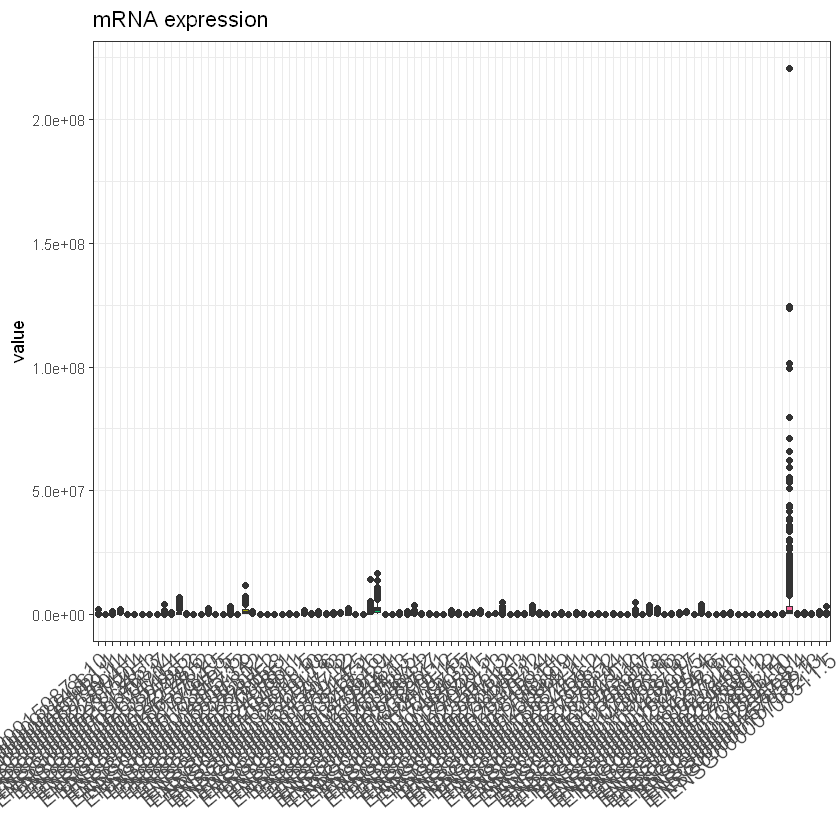

In [5]:
oldw <- getOption("warn")
options(warn = -1)
mutiboxplot( mRNA100 )
options(warn = oldw)

In [4]:
mRNA100.normal = data.frame( apply(mRNA100, 2, function(x) ( x-min(x))/(max(x)-min(x)) )  )
summary( mRNA100.normal )

 ENSG00000150873.10 ENSG00000224861.1 ENSG00000005102.11 ENSG00000089159.14
 Min.   :0.000000   Min.   :0.00000   Min.   :0.000000   Min.   :0.0000    
 1st Qu.:0.001125   1st Qu.:0.03313   1st Qu.:0.008774   1st Qu.:0.1072    
 Median :0.002155   Median :0.04966   Median :0.024302   Median :0.1480    
 Mean   :0.006585   Mean   :0.06699   Mean   :0.063107   Mean   :0.1573    
 3rd Qu.:0.004875   3rd Qu.:0.08106   3rd Qu.:0.072927   3rd Qu.:0.1953    
 Max.   :1.000000   Max.   :1.00000   Max.   :1.000000   Max.   :1.0000    
 ENSG00000273004.1 ENSG00000228110.4 ENSG00000270720.1 ENSG00000231345.3
 Min.   :0.0000    Min.   :0.00000   Min.   :0.00000   Min.   :0.00000  
 1st Qu.:0.0759    1st Qu.:0.06624   1st Qu.:0.03807   1st Qu.:0.01480  
 Median :0.1085    Median :0.12643   Median :0.06487   Median :0.03834  
 Mean   :0.1320    Mean   :0.15317   Mean   :0.09019   Mean   :0.08525  
 3rd Qu.:0.1631    3rd Qu.:0.21057   3rd Qu.:0.11089   3rd Qu.:0.10851  
 Max.   :1.0000    Max.   :1.0

In [5]:
oldw <- getOption("warn")
options(warn = -1)
mutiboxplot( mRNA100.normal )
options(warn = oldw)

Using  as id variables


ERROR: Error in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, : factor level [2] is duplicated


In [6]:
stage <- fread("stage.csv")
head( stage)
summary( stage )

,stage
1,stage_4
2,stage_4
3,stage_4
4,stage_4
5,stage_4
6,stage_4


    stage          
 Length:1195       
 Class :character  
 Mode  :character  

In [7]:
oldw <- getOption("warn")
options(warn = -1)

stage.order = stage

stage.order[stage == 'stage_1' ] = 1
stage.order[stage == 'stage_2' ] = 2
stage.order[stage == 'stage_3' ] = 3
stage.order[stage == 'stage_4' ] = 4
stage.order_i =  as.numeric( as.character( stage.order$stage ) ) 
class( stage.order_i )
summary( stage.order_i )

options(warn = oldw)

[1] "numeric"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   2.000   2.099   2.000   4.000 

In [8]:
mRNA100.data <- cbind( mRNA100.normal ,  stage.order_i   )
summary( mRNA100.data )

 ENSG00000150873.10 ENSG00000224861.1 ENSG00000005102.11 ENSG00000089159.14
 Min.   :0.000000   Min.   :0.00000   Min.   :0.000000   Min.   :0.0000    
 1st Qu.:0.001125   1st Qu.:0.03313   1st Qu.:0.008774   1st Qu.:0.1072    
 Median :0.002155   Median :0.04966   Median :0.024302   Median :0.1480    
 Mean   :0.006585   Mean   :0.06699   Mean   :0.063107   Mean   :0.1573    
 3rd Qu.:0.004875   3rd Qu.:0.08106   3rd Qu.:0.072927   3rd Qu.:0.1953    
 Max.   :1.000000   Max.   :1.00000   Max.   :1.000000   Max.   :1.0000    
 ENSG00000273004.1 ENSG00000228110.4 ENSG00000270720.1 ENSG00000231345.3
 Min.   :0.0000    Min.   :0.00000   Min.   :0.00000   Min.   :0.00000  
 1st Qu.:0.0759    1st Qu.:0.06624   1st Qu.:0.03807   1st Qu.:0.01480  
 Median :0.1085    Median :0.12643   Median :0.06487   Median :0.03834  
 Mean   :0.1320    Mean   :0.15317   Mean   :0.09019   Mean   :0.08525  
 3rd Qu.:0.1631    3rd Qu.:0.21057   3rd Qu.:0.11089   3rd Qu.:0.10851  
 Max.   :1.0000    Max.   :1.0

포아송 모형 

In [10]:
summary(m1 <- glm(stage.order_i  ~. , family="poisson", data=mRNA100.data))


Call:
glm(formula = stage.order_i ~ ., family = "poisson", data = mRNA100.data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.10537  -0.21383  -0.01052   0.20727   1.24071  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)   
(Intercept)         0.616201   0.234295   2.630  0.00854 **
ENSG00000150873.10  0.429980   0.608850   0.706  0.48005   
ENSG00000224861.1   0.118043   0.465585   0.254  0.79985   
ENSG00000005102.11 -0.266342   0.511870  -0.520  0.60283   
ENSG00000089159.14  0.374598   0.342127   1.095  0.27356   
ENSG00000273004.1   0.015013   0.274536   0.055  0.95639   
ENSG00000228110.4  -0.148438   0.199488  -0.744  0.45682   
ENSG00000270720.1  -0.111246   0.288451  -0.386  0.69974   
ENSG00000231345.3   0.067633   0.190296   0.355  0.72228   
ENSG00000166763.7  -0.246461   0.324553  -0.759  0.44762   
ENSG00000121101.14  0.068020   0.658057   0.103  0.91767   
ENSG00000267470.4   0.196404   1.025537   0.192  0.84812   


로직스틱모형

In [29]:
stage.logit = rep(0, times = nrow( stage ) )
#stage.logit[stage == 'stage_1' ] = 0
#stage.logit[stage == 'stage_2' ] = 0
stage.logit[stage == 'stage_3' ] = 1
stage.logit[stage == 'stage_4' ] = 1
stage.logit = as.factor(stage.logit)
summary( stage.logit )

0   1 
898 297

In [31]:
mRNA100.data2 <- cbind( mRNA100.normal ,  stage.logit   )
summary( mRNA100.data2 )

 ENSG00000150873.10 ENSG00000224861.1 ENSG00000005102.11 ENSG00000089159.14
 Min.   :0.000000   Min.   :0.00000   Min.   :0.000000   Min.   :0.0000    
 1st Qu.:0.001125   1st Qu.:0.03313   1st Qu.:0.008774   1st Qu.:0.1072    
 Median :0.002155   Median :0.04966   Median :0.024302   Median :0.1480    
 Mean   :0.006585   Mean   :0.06699   Mean   :0.063107   Mean   :0.1573    
 3rd Qu.:0.004875   3rd Qu.:0.08106   3rd Qu.:0.072927   3rd Qu.:0.1953    
 Max.   :1.000000   Max.   :1.00000   Max.   :1.000000   Max.   :1.0000    
 ENSG00000273004.1 ENSG00000228110.4 ENSG00000270720.1 ENSG00000231345.3
 Min.   :0.0000    Min.   :0.00000   Min.   :0.00000   Min.   :0.00000  
 1st Qu.:0.0759    1st Qu.:0.06624   1st Qu.:0.03807   1st Qu.:0.01480  
 Median :0.1085    Median :0.12643   Median :0.06487   Median :0.03834  
 Mean   :0.1320    Mean   :0.15317   Mean   :0.09019   Mean   :0.08525  
 3rd Qu.:0.1631    3rd Qu.:0.21057   3rd Qu.:0.11089   3rd Qu.:0.10851  
 Max.   :1.0000    Max.   :1.0

In [35]:
summary(m2 <- glm(stage.logit  ~. , family="binomial", data=mRNA100.data2))


Call:
glm(formula = stage.logit ~ ., family = "binomial", data = mRNA100.data2)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.80629  -0.74506  -0.49905  -0.00002   2.67495  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -2.808445   0.941094  -2.984 0.002843 ** 
ENSG00000150873.10   9.963385   6.974084   1.429 0.153111    
ENSG00000224861.1   -0.134001   2.270027  -0.059 0.952928    
ENSG00000005102.11  -1.723921   2.004745  -0.860 0.389833    
ENSG00000089159.14   2.953596   1.260045   2.344 0.019076 *  
ENSG00000273004.1   -1.461506   1.156501  -1.264 0.206327    
ENSG00000228110.4   -1.603112   0.801865  -1.999 0.045583 *  
ENSG00000270720.1   -0.099886   1.232918  -0.081 0.935429    
ENSG00000231345.3    0.541788   0.725798   0.746 0.455382    
ENSG00000166763.7   -3.753346   1.594057  -2.355 0.018543 *  
ENSG00000121101.14  -1.263640   3.015263  -0.419 0.675157    
ENSG00000267470.4    0.545332   4.59

- ENSG00000089159.14   2.953596   1.260045   2.344 0.019076 *  
- ENSG00000228110.4   -1.603112   0.801865  -1.999 0.045583 *  
- ENSG00000166763.7   -3.753346   1.594057  -2.355 0.018543 *  
- ENSG00000232499.2  -24.547412  10.331068  -2.376 0.017498 *  
- ENSG00000272140.2    5.660691   2.414900   2.344 0.019075 *  
- ENSG00000258630.1   -4.150331   2.226680  -1.864 0.062334 .  
- ENSG00000249791.1   -4.956966   1.729226  -2.867 0.004149 ** 
- ENSG00000154721.13   6.916770   1.851605   3.736 0.000187 ***
- ENSG00000135914.5    2.978768   1.038832   2.867 0.004138 ** 
- ENSG00000124664.9    2.718063   1.109900   2.449 0.014328 *  
- ENSG00000203364.2    2.715868   1.423201   1.908 0.056355 .  
- ENSG00000160973.7    5.210980   2.600407   2.004 0.045080 *  
- ENSG00000141314.11   4.739996   2.595767   1.826 0.067843 .  
- ENSG00000184277.11   1.691261   0.915829   1.847 0.064791 .  
- ENSG00000269608.1   -2.056701   0.897455  -2.292 0.021923 *  
- ENSG00000177380.12   1.273751   0.678129   1.878 0.060336 .  

In [36]:
summary(m3 <- glm(stage.logit  ~ ENSG00000089159.14+ENSG00000228110.4 +ENSG00000166763.7 +ENSG00000232499.2 +ENSG00000272140.2 +ENSG00000258630.1 +ENSG00000249791.1 +ENSG00000154721.13+ENSG00000135914.5 +ENSG00000124664.9 +ENSG00000203364.2 +ENSG00000160973.7 +ENSG00000141314.11+ENSG00000184277.11+ENSG00000269608.1 +ENSG00000177380.12 , family="binomial", data=mRNA100.data2))


Call:
glm(formula = stage.logit ~ ENSG00000089159.14 + ENSG00000228110.4 + 
    ENSG00000166763.7 + ENSG00000232499.2 + ENSG00000272140.2 + 
    ENSG00000258630.1 + ENSG00000249791.1 + ENSG00000154721.13 + 
    ENSG00000135914.5 + ENSG00000124664.9 + ENSG00000203364.2 + 
    ENSG00000160973.7 + ENSG00000141314.11 + ENSG00000184277.11 + 
    ENSG00000269608.1 + ENSG00000177380.12, family = "binomial", 
    data = mRNA100.data2)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.67598  -0.77002  -0.60121  -0.03782   2.35798  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -2.3072     0.3323  -6.944 3.81e-12 ***
ENSG00000089159.14   3.1603     0.9780   3.232  0.00123 ** 
ENSG00000228110.4   -1.6112     0.6418  -2.510  0.01206 *  
ENSG00000166763.7   -3.3252     1.3202  -2.519  0.01178 *  
ENSG00000232499.2  -19.1870     7.7235  -2.484  0.01298 *  
ENSG00000272140.2    4.0113     1.9075   2.103  0.03548 *  
ENSG00000

- ENSG00000124664.9, ENSG00000089159.14, ENSG00000135914.5, ENSG00000177380.12 , ENSG00000160973.7 유전자가  stage1~2와 stage_3~4를 구분하는데 유의한 유전자인것을 확인할 수 있음.


- ENSG00000124664.9 유전자에 대한 기능을 ensembl 사이트에서 확인할 수 있음.

![](논문과제_01.jpg)

http://www.ensembl.org/Homo_sapiens/Gene/Summary?db=core;g=ENSG00000124664;r=6:34537802-34556333